In [2]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
import numpy as np
import pandas as pd
import datetime as dt

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(june)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [6]:
#  3. Convert the June temperatures to a list.
june_temp = list(june)

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp = pd.DataFrame(june_temp, columns=['June temps'])
print(june_temp)

      June temps
0           78.0
1           76.0
2           78.0
3           76.0
4           77.0
...          ...
1695        79.0
1696        74.0
1697        74.0
1698        76.0
1699        75.0

[1700 rows x 1 columns]


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp.describe()

,June temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


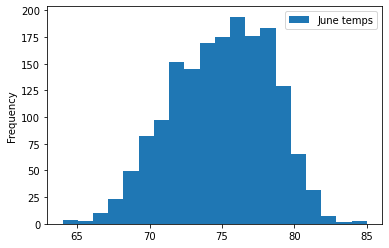

In [9]:
june_temp.plot.hist(bins=20)


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(dec)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [11]:
# 7. Convert the December temperatures to a list.
dec_temp = list(dec)

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp = pd.DataFrame(dec_temp, columns=['December temps'])
print(dec_temp)

      December temps
0               76.0
1               74.0
2               74.0
3               64.0
4               64.0
...              ...
1512            71.0
1513            71.0
1514            69.0
1515            65.0
1516            65.0

[1517 rows x 1 columns]


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp.describe()

,December temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


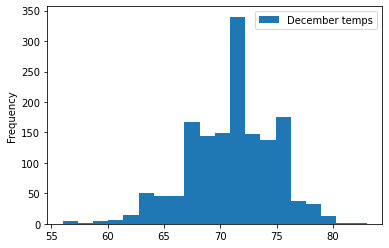

In [14]:
dec_temp.plot.hist(bins=20)


In [15]:
session.query(func.count(Station.station)).all()

[(9)]

In [17]:
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).filter(extract('month', Measurement.date) == 6).order_by(func.count(Measurement.station).desc()).all()

[('USC00519397', 236),
 ('USC00519281', 236),
 ('USC00513117', 236),
 ('USC00519523', 232),
 ('USC00516128', 223),
 ('USC00514830', 186),
 ('USC00511918', 165),
 ('USC00517948', 148),
 ('USC00518838', 38)]

In [18]:
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).filter(extract('month', Measurement.date) == 12).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 217),
 ('USC00513117', 216),
 ('USC00519523', 210),
 ('USC00519397', 210),
 ('USC00516128', 206),
 ('USC00514830', 178),
 ('USC00511918', 152),
 ('USC00517948', 109),
 ('USC00518838', 19)]

In [108]:
import numpy as np
import pandas as pd
june2010 = session.query(Measurement.date,Measurement.tobs).filter(extract('year', Measurement.date) == 2010).filter(extract('month', Measurement.date) == 6).filter(Measurement.station == 'USC00519281').all()
june20_df = pd.DataFrame(june2010, columns=['date','2010'])
june20_df['date'] = pd.DatetimeIndex(june20_df['date']).day
june20_df.set_index(june20_df['date'], inplace=True)

june2011 = session.query(Measurement.date,Measurement.tobs).filter(extract('year', Measurement.date) == 2011).filter(extract('month', Measurement.date) == 6).filter(Measurement.station == 'USC00519281').all()
june21_df = pd.DataFrame(june2011, columns=['date','2011'])
june21_df['date'] = pd.DatetimeIndex(june21_df['date']).day
june21_df.set_index(june21_df['date'], inplace=True)

june2012 = session.query(Measurement.date,Measurement.tobs).filter(extract('year', Measurement.date) == 2012).filter(extract('month', Measurement.date) == 6).filter(Measurement.station == 'USC00519281').all()
june22_df = pd.DataFrame(june2012, columns=['date','2012'])
june22_df['date'] = pd.DatetimeIndex(june22_df['date']).day
june22_df.set_index(june22_df['date'], inplace=True)

june2013 = session.query(Measurement.date,Measurement.tobs).filter(extract('year', Measurement.date) == 2013).filter(extract('month', Measurement.date) == 6).filter(Measurement.station == 'USC00519281').all()
june23_df = pd.DataFrame(june2013, columns=['date','2013'])
june23_df['date'] = pd.DatetimeIndex(june23_df['date']).day
june23_df.set_index(june23_df['date'], inplace=True)

june2014 = session.query(Measurement.date,Measurement.tobs).filter(extract('year', Measurement.date) == 2014).filter(extract('month', Measurement.date) == 6).filter(Measurement.station == 'USC00519281').all()
june24_df = pd.DataFrame(june2014, columns=['date','2014'])
june24_df['date'] = pd.DatetimeIndex(june24_df['date']).day
june24_df.set_index(june24_df['date'], inplace=True)

june2015 = session.query(Measurement.date,Measurement.tobs).filter(extract('year', Measurement.date) == 2015).filter(extract('month', Measurement.date) == 6).filter(Measurement.station == 'USC00519281').all()
june25_df = pd.DataFrame(june2015, columns=['date','2015'])
june25_df['date'] = pd.DatetimeIndex(june25_df['date']).day
june25_df.set_index(june25_df['date'], inplace=True)

june2016 = session.query(Measurement.date,Measurement.tobs).filter(extract('year', Measurement.date) == 2016).filter(extract('month', Measurement.date) == 6).filter(Measurement.station == 'USC00519281').all()
june26_df = pd.DataFrame(june2016, columns=['date','2016'])
june26_df['date'] = pd.DatetimeIndex(june26_df['date']).day
june26_df.set_index(june26_df['date'], inplace=True)



total=pd.concat([june20_df,june21_df,june22_df,june23_df,june24_df,june25_df,june26_df],axis=1)
total=total.drop(['date'],axis=1)
print(total)

      2010  2011  2012  2013  2014  2015  2016
date                                          
1     71.0  72.0  71.0  81.0  74.0  76.0  69.0
2     71.0  73.0  73.0  74.0  72.0  68.0  67.0
3     72.0  73.0  78.0  74.0  74.0  71.0  68.0
4     72.0   NaN  71.0  73.0  73.0  70.0  65.0
5     76.0   NaN  72.0  73.0  73.0  68.0  70.0
6     77.0   NaN  70.0  72.0  70.0  79.0  72.0
7     71.0   NaN  72.0  73.0  73.0  75.0  74.0
8     73.0  77.0  73.0  77.0  75.0  71.0  73.0
9     73.0  76.0  74.0  73.0  73.0  69.0  71.0
10    75.0  79.0  81.0  73.0  69.0  71.0  75.0
11    81.0  78.0  72.0  75.0  80.0  72.0  72.0
12    74.0  82.0  77.0  72.0  73.0  69.0  75.0
13    77.0  79.0  69.0  72.0  72.0  72.0  76.0
14    70.0  76.0  69.0  73.0  80.0  75.0  75.0
15    69.0  74.0  69.0  73.0  80.0  71.0  76.0
16    70.0  74.0  78.0  75.0  69.0  72.0  75.0
17    72.0  73.0  78.0  72.0  70.0  70.0  71.0
18    71.0  79.0  73.0  73.0  69.0  71.0  75.0
19    77.0  77.0  72.0  70.0  72.0  72.0  75.0
20    76.0  7

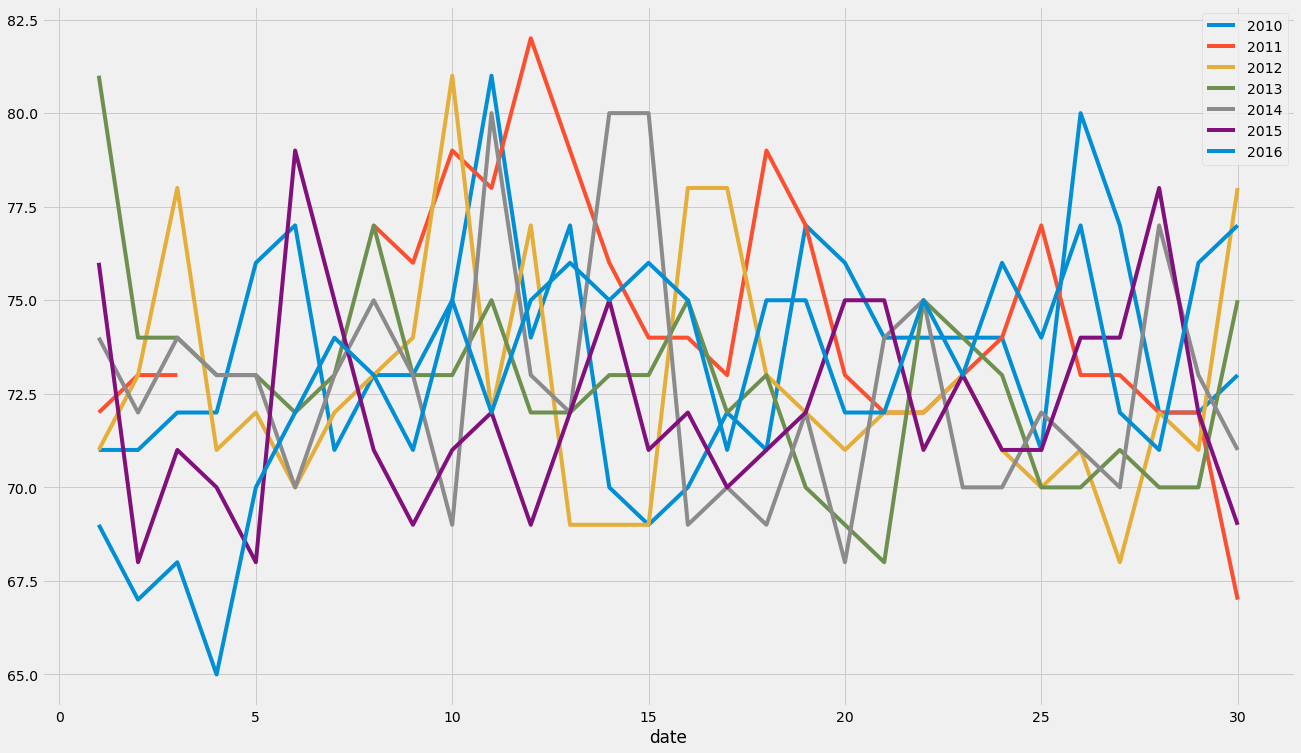

In [112]:
ax=total.plot(figsize=(20,12))
from matplotlib import style
style.use('fivethirtyeight')

In [29]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(extract('month', Measurement.date) == 6).filter(Measurement.station == 'USC00519281').all()

[(65.0, 82.0, 73.27118644067797)]

In [30]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(extract('month', Measurement.date) == 12).filter(Measurement.station == 'USC00519281').all()

[(58.0, 79.0, 69.90322580645162)]

In [31]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(extract('month', Measurement.date) == 6).filter(Measurement.station == 'USC00513117').all()

[(68.0, 83.0, 74.05084745762711)]

In [32]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(extract('month', Measurement.date) == 12).filter(Measurement.station == 'USC00513117').all()

[(63.0, 80.0, 71.06944444444444)]

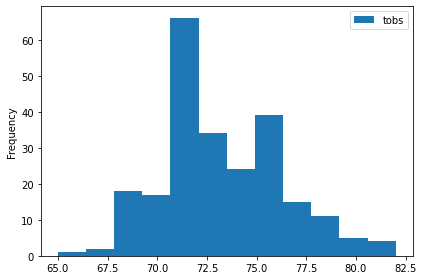

In [25]:
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(extract('month', Measurement.date) == 6).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

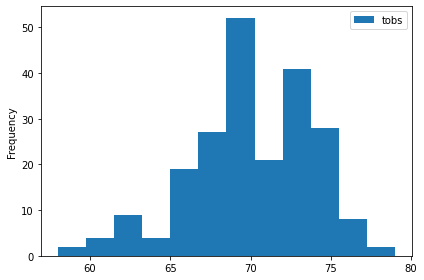

In [26]:
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(extract('month', Measurement.date) == 12).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

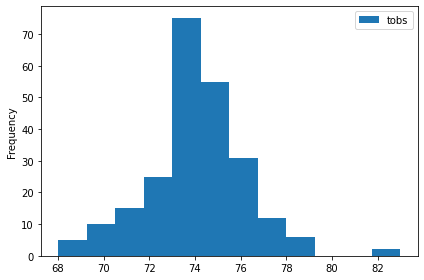

In [27]:
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00513117').filter(extract('month', Measurement.date) == 6).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

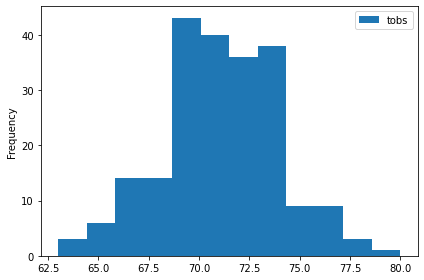

In [28]:
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00513117').filter(extract('month', Measurement.date) == 12).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [15]:
june_temp_prcp = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june_t_p = list(june_temp_prcp)
june_t_p = pd.DataFrame(june_t_p, columns=['june_temp','precipitation'])

In [16]:
print(june_t_p)

      june_temp  precipitation
0          78.0           0.00
1          76.0           0.01
2          78.0           0.00
3          76.0           0.00
4          77.0           0.00
...         ...            ...
1695       79.0           0.02
1696       74.0           0.10
1697       74.0           0.02
1698       76.0           0.04
1699       75.0           0.20

[1700 rows x 2 columns]


In [17]:
june_t_p.describe()

,june_temp,precipitation
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [19]:
june_temps=june_t_p['june_temp']
june_prcps=june_t_p['precipitation']

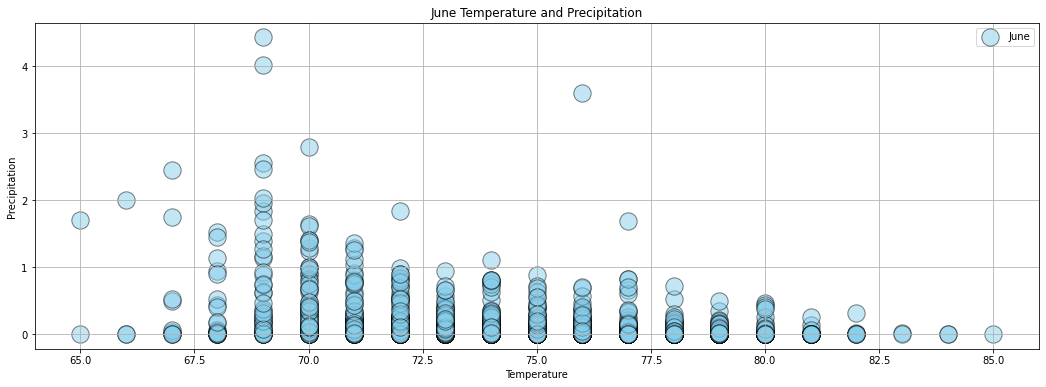

In [35]:
plt.subplots(figsize=(18, 6))
plt.scatter(june_temps,
            june_prcps, s=300, c="skyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="June")
plt.title("June Temperature and Precipitation")
plt.ylabel("Precipitation")
plt.xlabel("Temperature")
plt.grid(True)
plt.legend()

In [26]:
dec = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec = list(dec)
dec = pd.DataFrame(dec, columns=['dec_temp','precipitation'])

In [27]:
print(dec)

      dec_temp  precipitation
0         76.0           0.04
1         74.0           0.00
2         74.0           0.00
3         64.0           0.00
4         64.0           0.00
...        ...            ...
1512      71.0           0.14
1513      71.0           0.14
1514      69.0           1.03
1515      65.0           2.37
1516      65.0           0.90

[1517 rows x 2 columns]


In [28]:
dec.describe()

,dec_temp,precipitation
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


In [29]:
dec_temp=dec['dec_temp']
dec_prcp=dec['precipitation']

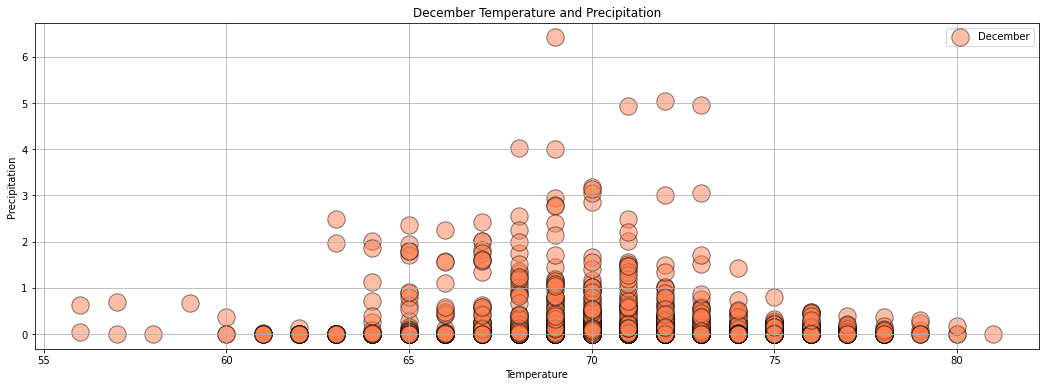

In [34]:
plt.subplots(figsize=(18, 6))
plt.scatter(dec_temp,
            dec_prcp, s=300, c="coral",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="December")
plt.title("December Temperature and Precipitation")
plt.ylabel("Precipitation")
plt.xlabel("Temperature")
plt.grid(True)
plt.legend()